# Social Dilemma RNN

The Social Dilemma, a documentary-drama hybrid explores the dangerous human impact of social
networking, with tech experts sounding the alarm on their own creations as the tech experts sound 
the alarm on the dangerous human impact of social networking. This dataset brings you thetwitter 
responses made with the #TheSocialDilemma hashtag after watching the eye-opening
documentary "The Social Dilemma" released in an OTT platform(Netflix) on September 9th, 2020.
You can categorize the tweets into different groups to identify the sentiment of the users regarding
the documentary.

**Goal**: You are hired as a deep learning engineer and you are asked to categorize the tweets into
three categories.

**Constraints**: You should be using only RNN to generate results and should not be using any 
LSTMor ML classification models to generate results.

**Data Description**: The dataset was extracted using TwitterAPI, consisting of nearly 20000
tweets from twitter users all over the globe!

1. **Attribute Information**:
2. **user_name** - The name of the user, as they’ve defined it.
3. **user_location** - The user-defined location for this account’s profile.
4. **user_description** - The user-defined UTF-8 string describing their account.
5. **user_created** - Time and date, when the account was created.
6. **user_followers** - The number of followers an account currently has.
7. **user_friends** – The number of friends an account currently has.
8. **user_favourites** - The number of favorites an account currently has.
9. **user_verified** - When true, indicates that the user has a verified account.
10.**date** - UTC time and date when the Tweet was created.
11. **hashtags** - All the other hashtags posted in the tweet along with #TheSocialDilemma
12. **source** - Utility used to post the Tweet, Tweets from the Twitter website have a
sourcevalue – web
13. **is_retweet** - Indicates whether this Tweet has been Retweeted by the authenticating user.
14. **clean_text** – Cleaned text of the tweet.
15. **Sentiment (target)** - Indicates the sentiment of the tweet, consists of three categories:
Positive, neutral, and negative.

**Provided Files**:

**Train_data** - Should be used to feed your model.

**Test_data** - Should be used only to generate predictions.

**Evaluation Criteria**:
The evaluation metric for this problem statement is the validation Accuracy Score.

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
train_data=pd.read_csv("/content/drive/MyDrive/colab/tweets_train.csv")

In [4]:
test_data=pd.read_csv("/content/drive/MyDrive/colab/tweets_test.csv")

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         16999 non-null  object
 1   user_location     13393 non-null  object
 2   user_description  15838 non-null  object
 3   user_created      17000 non-null  object
 4   user_followers    17000 non-null  int64 
 5   user_friends      17000 non-null  int64 
 6   user_favourites   17000 non-null  int64 
 7   user_verified     17000 non-null  bool  
 8   date              17000 non-null  object
 9   hashtags          13351 non-null  object
 10  source            17000 non-null  object
 11  is_retweet        17000 non-null  bool  
 12  clean_text        16992 non-null  object
 13  Sentiment         17000 non-null  object
dtypes: bool(2), int64(3), object(9)
memory usage: 1.6+ MB


In [6]:
train_data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text,Sentiment
0,Romy 👑,Bolton - England,"Tables turn, bridges burn, you live and learn.",2009-06-15 09:00:39,525,896,3854,False,2020-09-19 15:19:32,['TheSocialDilemma'],Twitter for Android,False,TheSocialDilemma is an eye opener isn t it ple...,Neutral
1,TLynn Peterson,"Black Canyon City, Arizona",Acquired disability ♿ after an accident. Livin...,2013-05-29 00:17:46,5045,5374,48152,False,2020-09-13 00:31:46,['TheSocialDilemma'],Twitter for Android,False,TheSocialDilemma If we don t agree on what is ...,Positive
2,Rutger Kosters,Netherlands,Cloud Solution Architect @NetApp | VCDX #209 |...,2014-10-07 09:34:10,574,251,1070,False,2020-09-09 21:10:33,['TheSocialDilemma'],Twitter for Android,False,Watching TheSocialDilemma scary to see social ...,Negative
3,IDFWU🗯🇿🇼🇿🇦,"East London, South Africa","YOU HAVE OPTIONS, YOU CAN’T JUST TAKE WHAT LIF...",2012-08-22 11:09:06,706,618,1320,False,2020-09-11 04:33:08,NaN,Twitter for Android,False,You check your social media before you pee in ...,Positive
4,Treebel,NaN,NaN,2010-09-25 07:25:31,9,13,55,False,2020-09-17 16:27:38,['thesocialdilemma'],Twitter for iPhone,False,watch thesocialdilemma and see what s actually...,Negative


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3068 entries, 0 to 3067
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         3068 non-null   object
 1   user_location     2467 non-null   object
 2   user_description  2847 non-null   object
 3   user_created      3068 non-null   object
 4   user_followers    3068 non-null   int64 
 5   user_friends      3068 non-null   int64 
 6   user_favourites   3068 non-null   int64 
 7   user_verified     3068 non-null   bool  
 8   date              3068 non-null   object
 9   hashtags          2420 non-null   object
 10  source            3068 non-null   object
 11  is_retweet        3068 non-null   bool  
 12  clean_text        3067 non-null   object
dtypes: bool(2), int64(3), object(8)
memory usage: 269.8+ KB


In [8]:
test_data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text
0,Doug Webb,Probably Europe,"I develop methods for effective cooperation, w...",2015-12-12 15:22:58,157,228,496,False,2020-09-15 22:53:36,"['theSocialDilemma', 'joinMastodon']",Twitter Web App,False,Watch theSocialDilemma then joinMastodon
1,Dan Reynish,"Medicine Hat, Alberta",News Anchor at Noon and 5 pm on CHAT TV. Canad...,2011-09-10 12:17:10,1722,2500,13912,False,2020-09-12 04:43:03,['WeTheNorth'],Twitter Web App,False,With the 2019 2020 NBA season officially over ...
2,🌤,NaN,NaN,2011-06-01 02:23:57,880,585,205,False,2020-09-19 07:06:53,['TheSocialDilemma'],Twitter for iPhone,False,if you want to really know about people go tal...
3,“IT IS WHAT IT IS.”🇰🇪🇳🇿🇺🇸,WA,Heliophile🌞☀️• #Rugby • Wildlifer • #HIV • #So...,2009-04-17 13:35:02,1143,2692,11999,False,2020-09-12 18:28:18,"['TheSocialDilemma', 'Netflix']",Twitter for iPhone,False,Have you watched TheSocialDilemma on Netflix
4,Mahima Sood,NaN,Amy Dunne X Holly Golightly || Data Scientist ...,2018-01-26 21:57:22,18,65,263,False,2020-09-12 18:48:53,['TheSocialDilemma'],Twitter for iPhone,False,Highly recommend TheSocialDilemma on


In [9]:
train_data.shape

(17000, 14)

In [10]:
train_data.clean_text

0        TheSocialDilemma is an eye opener isn t it ple...
1        TheSocialDilemma If we don t agree on what is ...
2        Watching TheSocialDilemma scary to see social ...
3        You check your social media before you pee in ...
4        watch thesocialdilemma and see what s actually...
                               ...                        
16995                            Watching TheSocialDilemma
16996    If you re not paying for the product you are t...
16997                  Watching TheSocialDilemma Let s see
16998    Yes TheSocialDilemma what a perfect time to be...
16999    had the impression that is actually sitting in...
Name: clean_text, Length: 17000, dtype: object

In [11]:
train_data.Sentiment

0         Neutral
1        Positive
2        Negative
3        Positive
4        Negative
           ...   
16995     Neutral
16996     Neutral
16997     Neutral
16998    Positive
16999    Negative
Name: Sentiment, Length: 17000, dtype: object

In [12]:
# Check for null values in 'clean_text'
train_data = train_data.dropna(subset=['clean_text'])


In [13]:
# Encode the target variable
label_encoder = LabelEncoder()
train_data['Sentiment'] = label_encoder.fit_transform(train_data['Sentiment'])

<ipython-input-13-38075ee871b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Sentiment'] = label_encoder.fit_transform(train_data['Sentiment'])


In [14]:
# Tokenize and pad the text
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_data['clean_text'])

In [15]:
X = tokenizer.texts_to_sequences(train_data['clean_text'])
X = pad_sequences(X, maxlen=100, padding='post')

In [16]:
y = train_data['Sentiment']

In [17]:
#  Building the RNN Model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=100))  # Adjust input_length
model.add(SimpleRNN(units=32))
model.add(Dense(units=3, activation='softmax'))



In [18]:
#  Compiling the Model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [19]:
# Training the Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


Epoch 1/10
425/425 [==============================] - 56s 125ms/step - loss: 0.9561 - accuracy: 0.5664 - val_loss: 0.8946 - val_accuracy: 0.6155
Epoch 2/10
425/425 [==============================] - 40s 95ms/step - loss: 0.8125 - accuracy: 0.6709 - val_loss: 0.8263 - val_accuracy: 0.6537
Epoch 3/10
425/425 [==============================] - 39s 91ms/step - loss: 0.7345 - accuracy: 0.7061 - val_loss: 0.7802 - val_accuracy: 0.6858
Epoch 4/10
425/425 [==============================] - 40s 94ms/step - loss: 0.6243 - accuracy: 0.7566 - val_loss: 0.7147 - val_accuracy: 0.7314
Epoch 5/10
425/425 [==============================] - 38s 89ms/step - loss: 0.5695 - accuracy: 0.7808 - val_loss: 0.7409 - val_accuracy: 0.7276
Epoch 6/10
425/425 [==============================] - 37s 88ms/step - loss: 0.5047 - accuracy: 0.8120 - val_loss: 0.7516 - val_accuracy: 0.7373
Epoch 7/10
425/425 [==============================] - 38s 91ms/step - loss: 0.6414 - accuracy: 0.7544 - val_loss: 0.8988 - val_accuracy

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 3)                 99        
                                                                 
Total params: 322179 (1.23 MB)
Trainable params: 322179 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
#  Evaluating the Model
accuracy = model.evaluate(X_test, y_test)[1]
print("Validation Accuracy:", accuracy)


107/107 [==============================] - 1s 9ms/step - loss: 0.8103 - accuracy: 0.7217
Validation Accuracy: 0.7216828465461731


In [22]:
#  Making Predictions (for the Test_data)
# Check for null values in 'clean_text'
test_data = test_data.dropna(subset=['clean_text'])

In [23]:
test_X = tokenizer.texts_to_sequences(test_data['clean_text'])


In [24]:
test_X = pad_sequences(test_X,maxlen=100)


In [25]:
predictions = model.predict(test_X)


96/96 [==============================] - 1s 9ms/step


In [28]:
predicted_sentiment = np.argmax(predictions, axis=1)

In [29]:
# Map numerical labels back to sentiment categories
sentiment_mapping_reverse = {0: 'Positive', 1: 'Neutral', 2: 'Negative'}

# Convert predicted labels to sentiment categories
predicted_sentiment = [sentiment_mapping_reverse.get(label, 'Unknown') for label in predicted_sentiment]

<Axes: ylabel='Sentiment'>

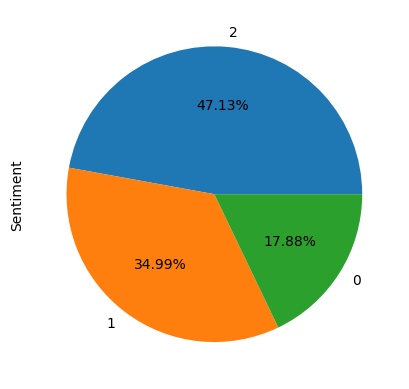

In [30]:
y_train.value_counts().plot(kind="pie",autopct="%.2f%%")


In [32]:
predicted_sentiment=pd.DataFrame(predicted_sentiment)

<Axes: >

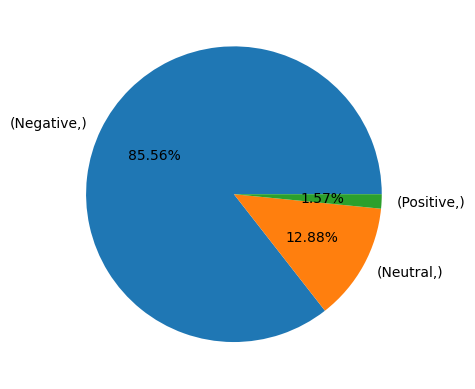

In [33]:
predicted_sentiment.value_counts().plot(kind="pie",autopct="%.2f%%")

In [34]:
predicted_sentiment.value_counts()

Negative    2624
Neutral      395
Positive      48
dtype: int64